# <span style="color:black;"><strong>Proyecto del curso: Detección de anomalias con MIMIC-III</strong></span> 

Se utilizó el ejemplo del repositorio de la profesora como plantilla, la mayoría de los diseños fueron inspirados en ese notebook.
## <span style="color:#2F749F;"><strong>🎯 Objetivos de aprendizaje del proyecto</strong></span>

> ✅ Diseñar y desarrollar un **proyecto aplicado de ciencia de datos**, siguiendo el ciclo de vida completo: definición del problema, análisis exploratorio, preparación y visualización de los datos.  
>
> ✅ Aplicar técnicas de **detección, imputación, escalamiento y transformación de datos**, garantizando la calidad y confiabilidad de la información utilizada.  
>
> ✅ Integrar **principios éticos y de responsabilidad** en el manejo de datos, considerando privacidad, transparencia y posibles impactos sociales.  
>
> ✅ Comunicar de manera **clara y visualmente efectiva los hallazgos** del proyecto, utilizando narrativas y herramientas de visualización que respalden la toma de decisiones.  



| Criterio | Descripción | Peso |
|----------|-------------|------|
| **Definición del problema y justificación de la base de datos** | El estudiante plantea de forma clara el problema o pregunta de investigación y justifica adecuadamente la selección de la base de datos. | **25%** |
| **Descripción de las variables y estructura de los datos** | Se presenta de manera exhaustiva la estructura del dataset (registros, variables, tipos de datos) y la clasificación de las variables clave. | **25%** |
| **Visualizaciones iniciales** | Las visualizaciones son pertinentes, de calidad y facilitan la comprensión inicial de los datos. | **25%** |
| **Interpretación y redacción** | Las interpretaciones son claras, bien fundamentadas y están redactadas de manera coherente. | **25%** |

## Introducción al problema planteado

El objetivo de este proyecto es identificar valores atípicos (outliers) en biomarcadores de pacientes para generar un sistema de alerta temprana. Al detectar mediciones de biomarcadores (como presión arterial, temperatura, ritmo cardíaco, glucosa, etc.) que superan los rangos normales, podemos alertar a los profesionales de la salud sobre posibles deterioros en el estado del paciente. Para esta tarea, utilizaremos la base de datos MIMIC-III, una base de datos de libre acceso que contiene información de pacientes hospitalizados en unidades de cuidados intensivos de hospitales de USA.


## Proceso de acotamiento y preparación del dataset
El dataset original de MIMIC-III, debido a su gran tamaño y la forma en que se estructuran los datos de biomarcadores (en formato "largo" o long format), requirió un proceso de acotamiento y preparación para hacerlo manejable para este análisis.

El archivo original contiene una columna que almacena todos los valores de las mediciones de biomarcadores, y otra columna con un identificador o código que especifica qué tipo de biomarcador es (por ejemplo, ritmo cardíaco, temperatura, etc.). Para poder trabajar con las variables de manera individual (un formato "ancho" o wide format), realizamos el siguiente procedimiento:

- Procesamiento por biomarcador: Se procesó el dataset original en chunks (fragmentos) para manejar el gran volumen de datos sin sobrecargar la memoria.

- Filtrado por código: En cada chunk, se filtraron los datos para seleccionar únicamente los biomarcadores de interés (ritmo cardíaco, presión arterial, temperatura, etc.), identificándolos por sus códigos o IDs únicos.

- Extracción y almacenamiento: Los datos filtrados para cada biomarcador se extrajeron y guardaron en archivos CSV separados.

- Ensamblaje del dataset final: Una vez que se extrajeron los datos de cada biomarcador, se ensamblaron en un único DataFrame.

- Organización cronológica: Finalmente, el dataset ensamblado se ordenó por la fecha y hora de la toma de la muestra (CHARTTIME) para asegurar que el análisis de la evolución temporal de los biomarcadores fuera preciso.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_archivo = 'C:/Users/User/Documents/Proyectos_Programacion/MIMIC-Dataset/df_merged_completos.csv'

In [3]:
try:
    df_mimic = pd.read_csv(ruta_archivo)   
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta: {ruta_archivo}")
except Exception as e:
    print(f"Ocurrió un error al intentar leer el archivo: {e}")

C:\Users\User\AppData\Local\Temp\ipykernel_15028\1573887277.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mimic = pd.read_csv(ruta_archivo)


In [4]:
df_mimic.head()

,SUBJECT_ID,HADM_ID,CHARTTIME,HEART_RATE_VALUE,HEART_RATE_UOM,TEMPERATURE_VALUE,TEMPERATURE_UOM,OXYGEN_SAT_VALUE,OXYGEN_SAT_UOM,BLOOD_DIASTOLIC_VALUE,BLOOD_DIASTOLIC_UOM,BLOOD_SYSTOLIC_VALUE,BLOOD_SYSTOLIC_UOM,GLUCOSE_VALUE,GLUCOSE_UOM
0,2,163353,2138-07-17 20:20:00,148.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,163353,2138-07-17 20:30:00,131.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,163353,2138-07-17 21:00:00,144.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,163353,2138-07-17 22:00:00,140.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,145834,2101-10-20 18:45:00,95.0,BPM,NaN,NaN,98.0,%,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9028427 entries, 0 to 9028426
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SUBJECT_ID             int64  
 1   HADM_ID                int64  
 2   CHARTTIME              object 
 3   HEART_RATE_VALUE       float64
 4   HEART_RATE_UOM         object 
 5   TEMPERATURE_VALUE      float64
 6   TEMPERATURE_UOM        object 
 7   OXYGEN_SAT_VALUE       float64
 8   OXYGEN_SAT_UOM         object 
 9   BLOOD_DIASTOLIC_VALUE  float64
 10  BLOOD_DIASTOLIC_UOM    object 
 11  BLOOD_SYSTOLIC_VALUE   float64
 12  BLOOD_SYSTOLIC_UOM     object 
 13  GLUCOSE_VALUE          object 
 14  GLUCOSE_UOM            object 
dtypes: float64(5), int64(2), object(8)
memory usage: 1.0+ GB


## Descripción de la base de datos
La base de datos utilizada para este análisis es la MIMIC-III. A continuación, se detalla su estructura, número de registros, variables y tipos de datos.

*Estructura y tamaño*: La base de datos contiene 9,028,427 registros y 15 columnas.

### Variables y tipos de datos:



| Nombre de la variable      | Descripción (qué significa)                  | Codificación (tipo de variable) | Significado clínico (fundamental)                       |
|----------------------------|----------------------------------------------|---------------------------------|---------------------------------------------------------|
| SUBJECT_ID                 | Identificador único del paciente en todo el dataset. Se mantiene igual en todas sus estancias.             | int64                           | Identifica al paciente                                  |
| HADM_ID                    | Identificador del ingreso hospitalario del paciente. Cada vez que el paciente es admitido, se genera uno nuevo.    | int64                           | Identifica el episodio de hospitalización               |
| CHARTTIME                  | Marca de tiempo en la que se registró la observación.                  | object (timestamp/string)       | Indica cuándo se tomó el dato                           |
| HEART_RATE_VALUE           | Frecuencia cardíaca (latidos por minuto)     | float64                         | Evalúa ritmo cardíaco: bajo, normal o elevado           |
| HEART_RATE_UOM             | Unidad de frecuencia cardíaca                | object                          | Usualmente bpm                                          |
| TEMPERATURE_VALUE          | Temperatura corporal                         | float64                         | Indica fiebre, normalidad o hipotermia                  |
| TEMPERATURE_UOM            | Unidad de temperatura                        | object                          | Usualmente °C                                           |
| OXYGEN_SAT_VALUE           | Saturación de oxígeno en sangre              | float64                         | Evalúa nivel de oxigenación                             |
| OXYGEN_SAT_UOM             | Unidad de saturación de oxígeno              | object                          | Usualmente %                                            |
| BLOOD_DIASTOLIC_VALUE      | Presión arterial diastólica                  | float64                         | Evalúa presión mínima arterial                          |
| BLOOD_DIASTOLIC_UOM        | Unidad presión diastólica                    | object                          | Usualmente mmHg                                         |
| BLOOD_SYSTOLIC_VALUE       | Presión arterial sistólica                   | float64                         | Evalúa presión máxima arterial                          |
| BLOOD_SYSTOLIC_UOM         | Unidad presión sistólica                     | object                          | Usualmente mmHg                                         |
| GLUCOSE_VALUE              | Nivel de glucosa en sangre                   | object (numérico tipo string)   | Evalúa control glucémico                                |
| GLUCOSE_UOM                | Unidad de glucosa en sangre                  | object                          | Usualmente mg/dL                                        |



## Visualizaciones exploratorias iniciales
En esta sección, se crearán gráficos para entender la distribución y el rango de valores de cada biomarcador. La exploración visual nos ayudará a identificar problemas como valores faltantes, distribuciones sesgadas y, lo más importante, a tener una primera idea de los posibles outliers.

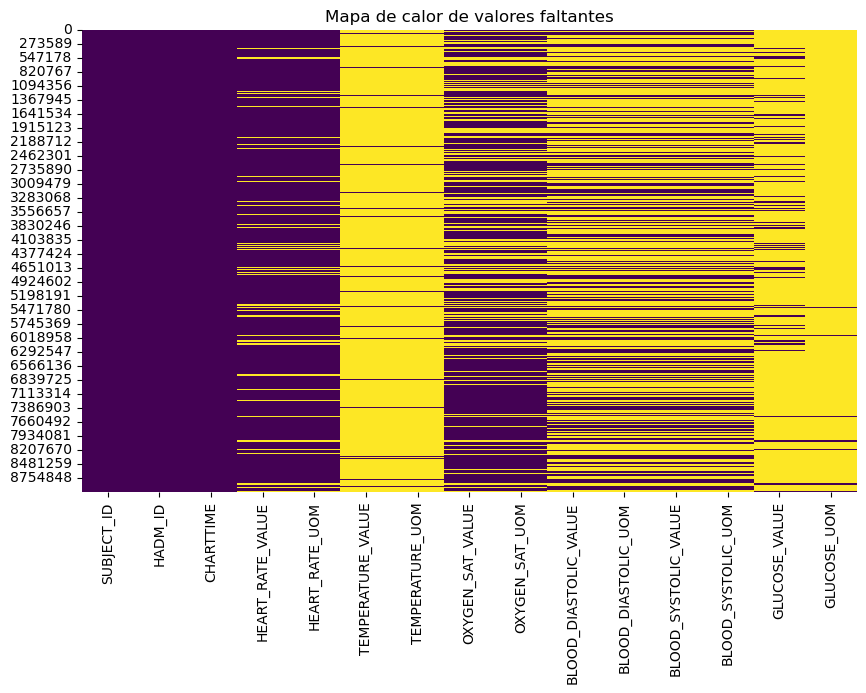

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_mimic.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [21]:
# Acotar el DataFrame a los primeros 100,000 registros
df_acotado = df_mimic.head(100000)

print(f"Número de registros del dataset original: {len(df_mimic)}")
print(f"Número de registros del dataset acotado: {len(df_acotado)}")

Número de registros del dataset original: 9028427
Número de registros del dataset acotado: 100000


In [22]:
df_acotado = df_acotado.rename(columns={
    "HEART_RATE_VALUE": "HEART_RATE",
    "TEMPERATURE_VALUE": "TEMPERATURE",
    "OXYGEN_SAT_VALUE": "OXYGEN_SAT",
    "BLOOD_DIASTOLIC_VALUE": "DIASTOLIC_BP",
    "BLOOD_SYSTOLIC_VALUE": "SYSTOLIC_BP",
    "GLUCOSE_VALUE": "GLUCOSE",
})


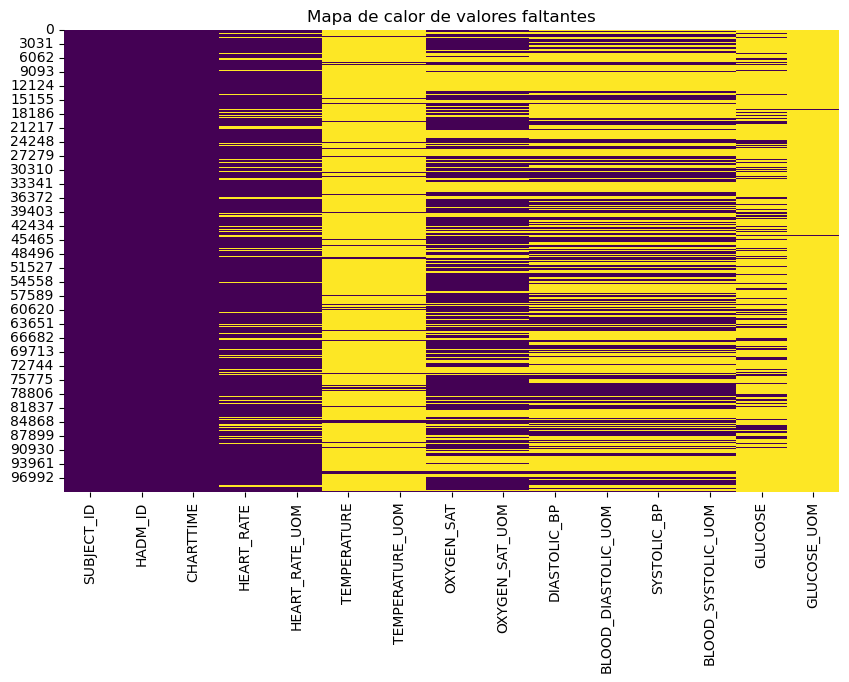

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_acotado.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [24]:
# Conteo de valores faltantes
faltantes = df_acotado.isnull().sum()

# Filtrar solo variables con valores faltantes
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

# Calcular % de valores faltantes
porcentaje = (faltantes / len(df_acotado)) * 100

# Mostrar resultado
print("\nConteo y porcentaje de valores faltantes por variable:")
print(pd.DataFrame({
    'Faltantes': faltantes,
    'Porcentaje (%)': porcentaje.round(2)
}))



Conteo y porcentaje de valores faltantes por variable:
                     Faltantes  Porcentaje (%)
GLUCOSE_UOM              99668           99.67
TEMPERATURE              92250           92.25
TEMPERATURE_UOM          92243           92.24
GLUCOSE                  80612           80.61
DIASTOLIC_BP             58660           58.66
BLOOD_DIASTOLIC_UOM      58653           58.65
SYSTOLIC_BP              58653           58.65
BLOOD_SYSTOLIC_UOM       58618           58.62
OXYGEN_SAT               36125           36.12
OXYGEN_SAT_UOM           36008           36.01
HEART_RATE               12759           12.76
HEART_RATE_UOM           12664           12.66


Como se puede observar en las imagenes anteriores de los mapas de calor en datos faltantes hay columnas las cuales en su mayoria estan vacias, pero haciendo un poco de exploracion para saber que contenian estos datos, basicamente es el valor de la medida por ejemplo en saturacion de oxigeno se mide en porcentaje con el simbolo "%"  asi que algunos de ellos se podrian llenar manualmente, pues se usa la misma medida, o validar por paciente y encontrar si alguna de sus columnas tiene el valor correspondiente, otros datos faltantes son simplemente por que no se toma el dato de los biomarcadores simultaneamente o a la misma hora en un paciente en un ingreso hospitalario

In [27]:
biomarcadores = ['HEART_RATE', 'TEMPERATURE', 'OXYGEN_SAT', 
                 'DIASTOLIC_BP', 'SYSTOLIC_BP', 'GLUCOSE']

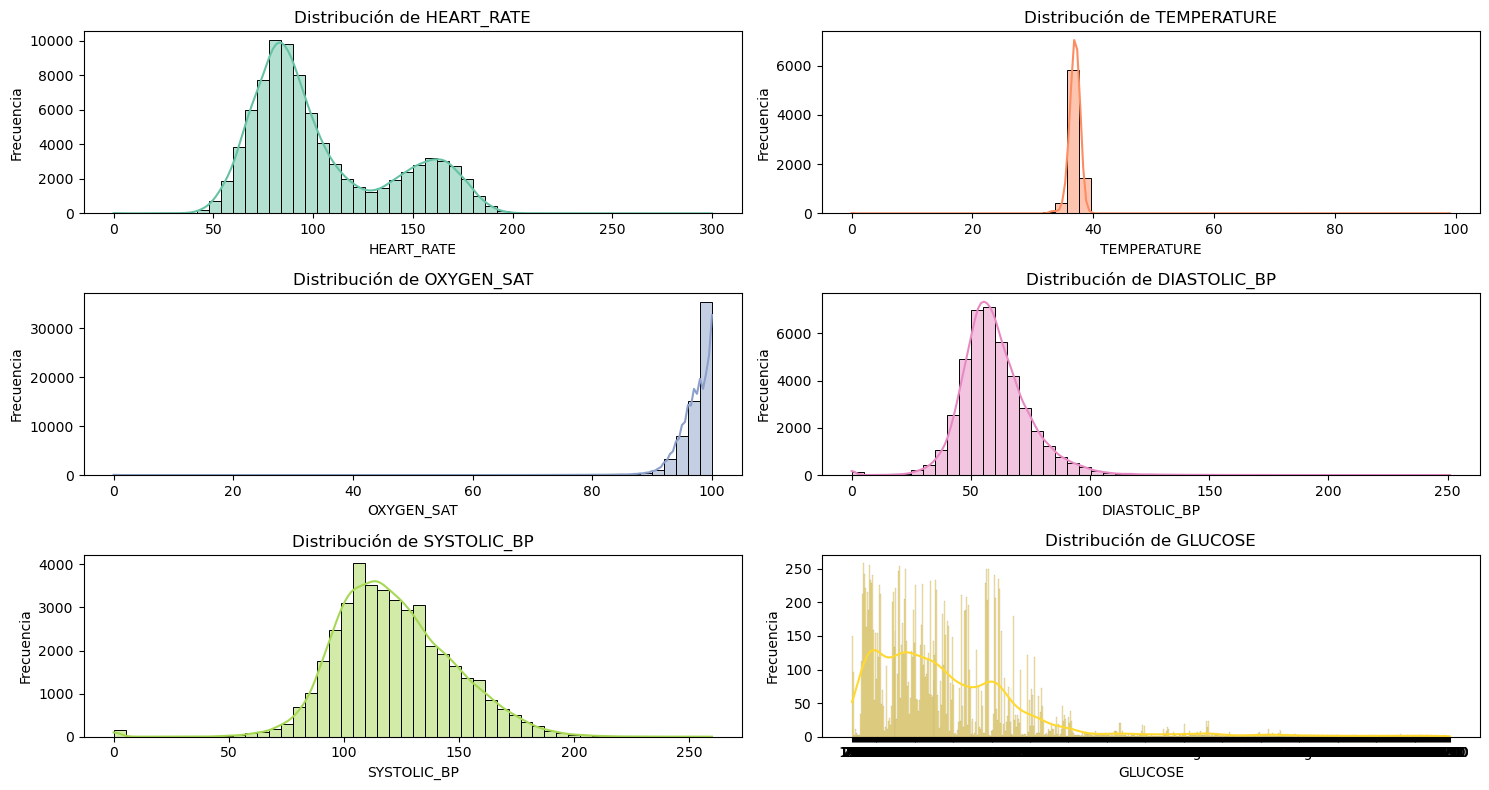

In [34]:
colors = sns.color_palette("Set2", 6)
fig, axes = plt.subplots(3, 2, figsize=(15, 8))
axes = axes.flatten()  # convertir a lista plana para iterar fácil

# Graficar cada biomarcador en su subplot
for i, col in enumerate(biomarcadores):
    sns.histplot(df_acotado[col].dropna(), kde=True, bins=50, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## ANALISIS

Se aprecia que algunos datos presentan una distribucion gausseana, pero en especifico la de HEART_RATE y GLUCOSE muestran una doble campana o una distribución no concluyente y que habra que hacer un analisis mas riguroso para poder interpretar los datos en el contexto, un contexto medico que es lo mas importante en esta situacion

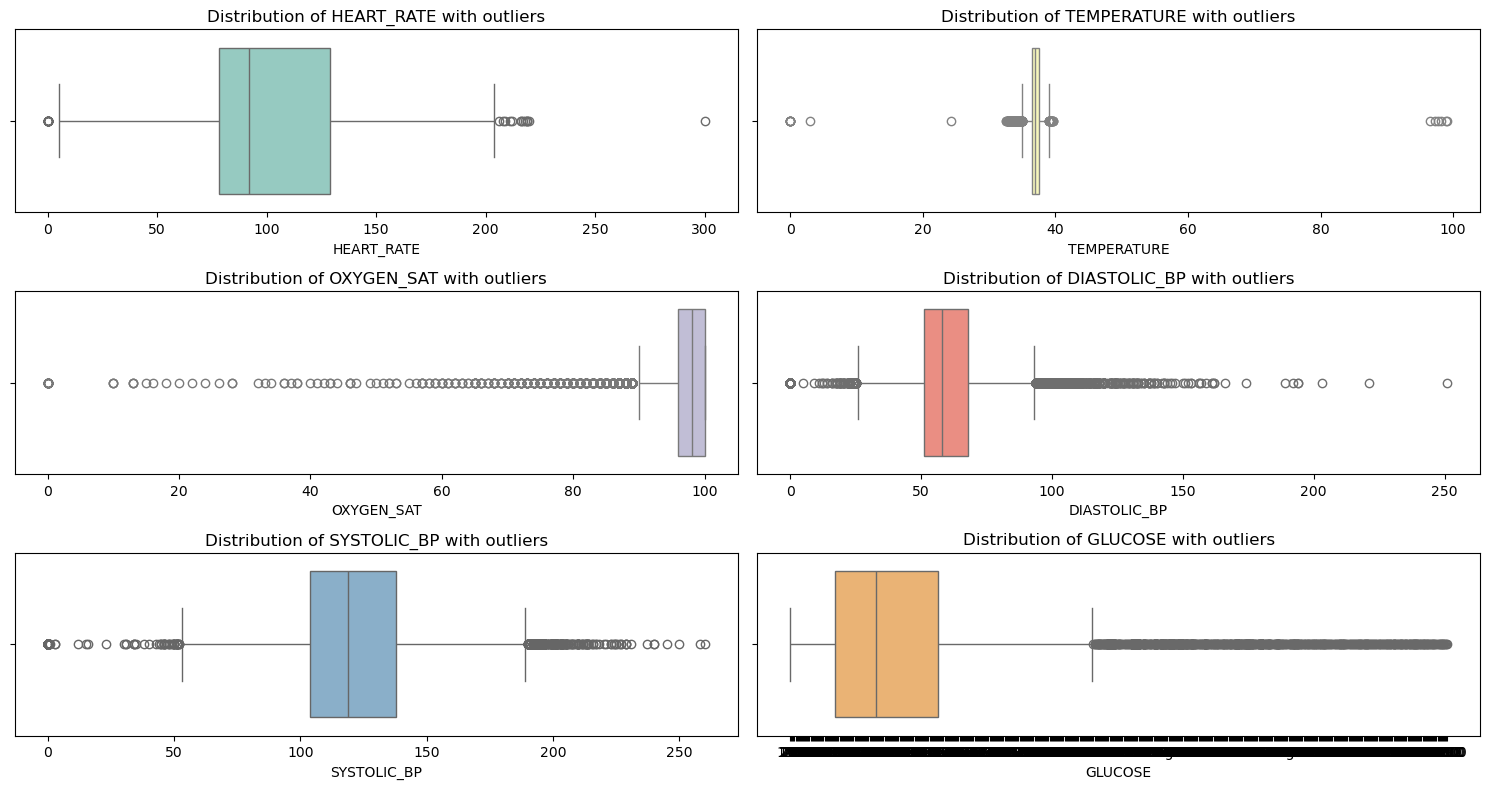

In [42]:
colors = sns.color_palette("Set3", 6)

fig, axes = plt.subplots(3, 2, figsize=(15, 8))
axes = axes.flatten()

# Graficar cada boxplot con color distinto
for i, col in enumerate(biomarcadores):
    sns.boxplot(x=df_acotado[col].dropna(), ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col} with outliers')
    axes[i].set_xlabel(col)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## ANALISIS

Se puede apreciar en los boxplot que la media de los datos apunta a una media global sana coinsiderada dentro de los estandares medicos, pero se aprecia mucho demasiado la presencia de datos atipicos en algunos signos vitales como la glucosa.

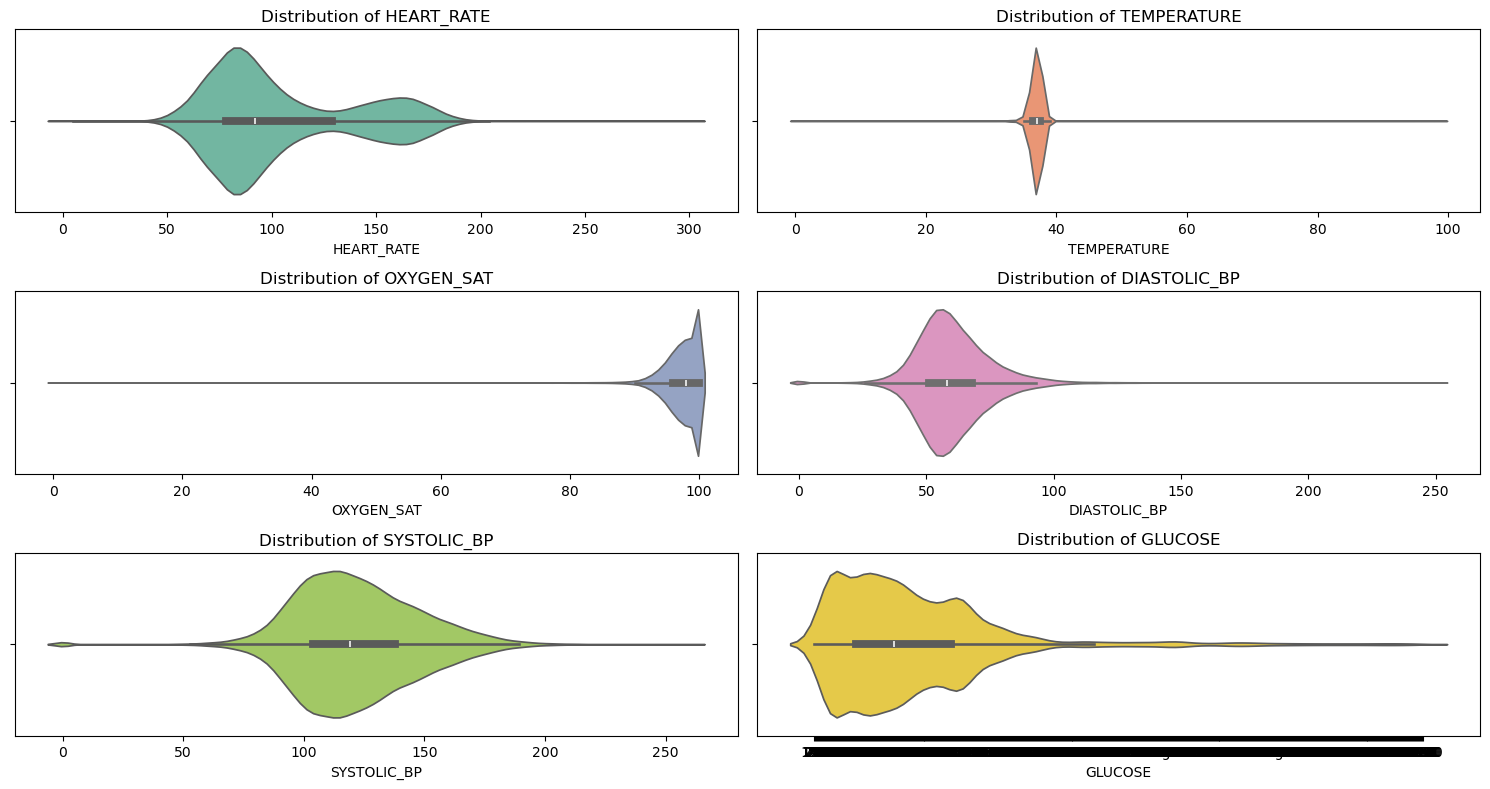

In [46]:
colors = sns.color_palette("Set2", 6)
fig, axes = plt.subplots(3, 2, figsize=(15, 8))
axes = axes.flatten()

# Graficar cada violin plot
for i, col in enumerate(biomarcadores):
    sns.violinplot(x=df_acotado[col].dropna(), ax=axes[i], color=colors[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Eliminar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

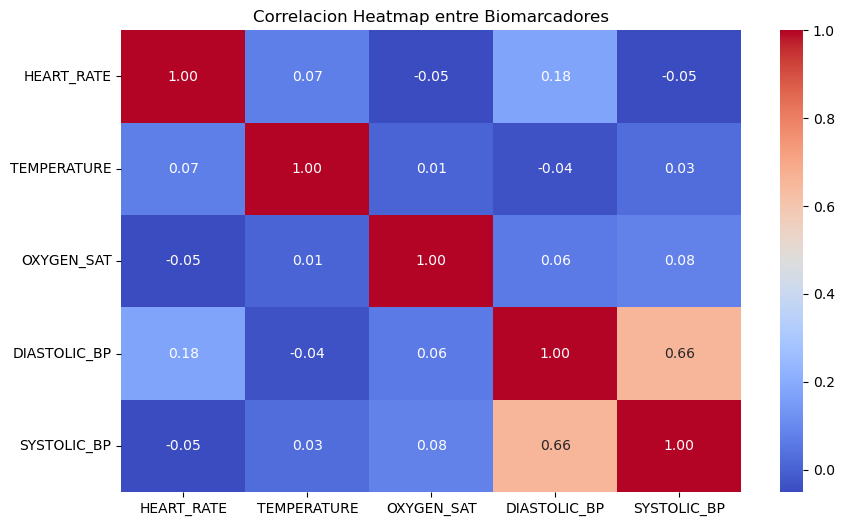

In [49]:
numeric_biomarcadores = df_acotado[biomarcadores].select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
corr = numeric_biomarcadores.corr()  # Calculate correlation only on numeric columns
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlacion Heatmap entre Biomarcadores")
plt.show()

## Interpretación de las visualizaciones exploratorias

Los histogramas muestran dos tipos de distribución para los biomarcadores:

- Valores concentrados: La saturación de oxígeno y la temperatura se agrupan en un rango estrecho y clínicamente normal (p. ej., saturación alta, temperatura cerca de 37°C). Esto es esperado, ya que desviaciones significativas de estos valores indicarían un estado de salud crítico en el paciente; aun que en otros valores resultan ser muy atipicos, demasiado extremos, la hipotesis inicial es que probablemente se hayan medido con escalas numericas propias que se usan comunmente en Estados Unidos por ejemplo XX **°F**.

- Distribución normal: Otros biomarcadores, como la presión sistólica, presentan una distribución más cercana a la normal (en forma de campana). Esto indica que los valores se agrupan alrededor de un promedio.

- El dataset resulta prometedor para la tarea de deteccion de datos atipicos en pacientes pues se puede apreciar que este posee demasiadas anomalias

Los gráficos de bigotes revelan la presencia de una alta cantidad de datos atípicos (outliers) en los biomarcadores, lo que es de gran relevancia clínica.

## Posibles problemas futuros

Debido a la alta dispersion, datos faltantes y la presencia de bastantes datos atipicos esto podria resultar un reto a la hora de filtrar y trastocar los datos del dataset por lo que hay que estar muy al dedal con las decisiones que se toman a la hora ya sea de imputar, normalizar o quitar datos en el dataset